In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [91]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [92]:
data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)

In [93]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [94]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [95]:
data.floor.value_counts()

1                       3904
2                       3074
3                       2478
4                       1882
Bajo                    1683
5                       1065
6                        644
7                        409
8                        240
Entreplanta exterior     219
9                        125
Semi-sótano exterior      50
Entreplanta interior      31
Semi-sótano interior      29
Sótano interior           21
Sótano exterior            4
Name: floor, dtype: int64

In [96]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [97]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [98]:
data.floor = pd.to_numeric(data.floor)

In [99]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,0,0,64.0,2,1.0,0,1,1,0,1,0,0,0,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,260000,2407,40.355841,-3.688399


In [100]:
data.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude'],
      dtype='object')

In [101]:
# Todos los datos

data = data [['is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

In [102]:
from pyod.models.knn import KNN

clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]
data = data.drop(dropea.index)

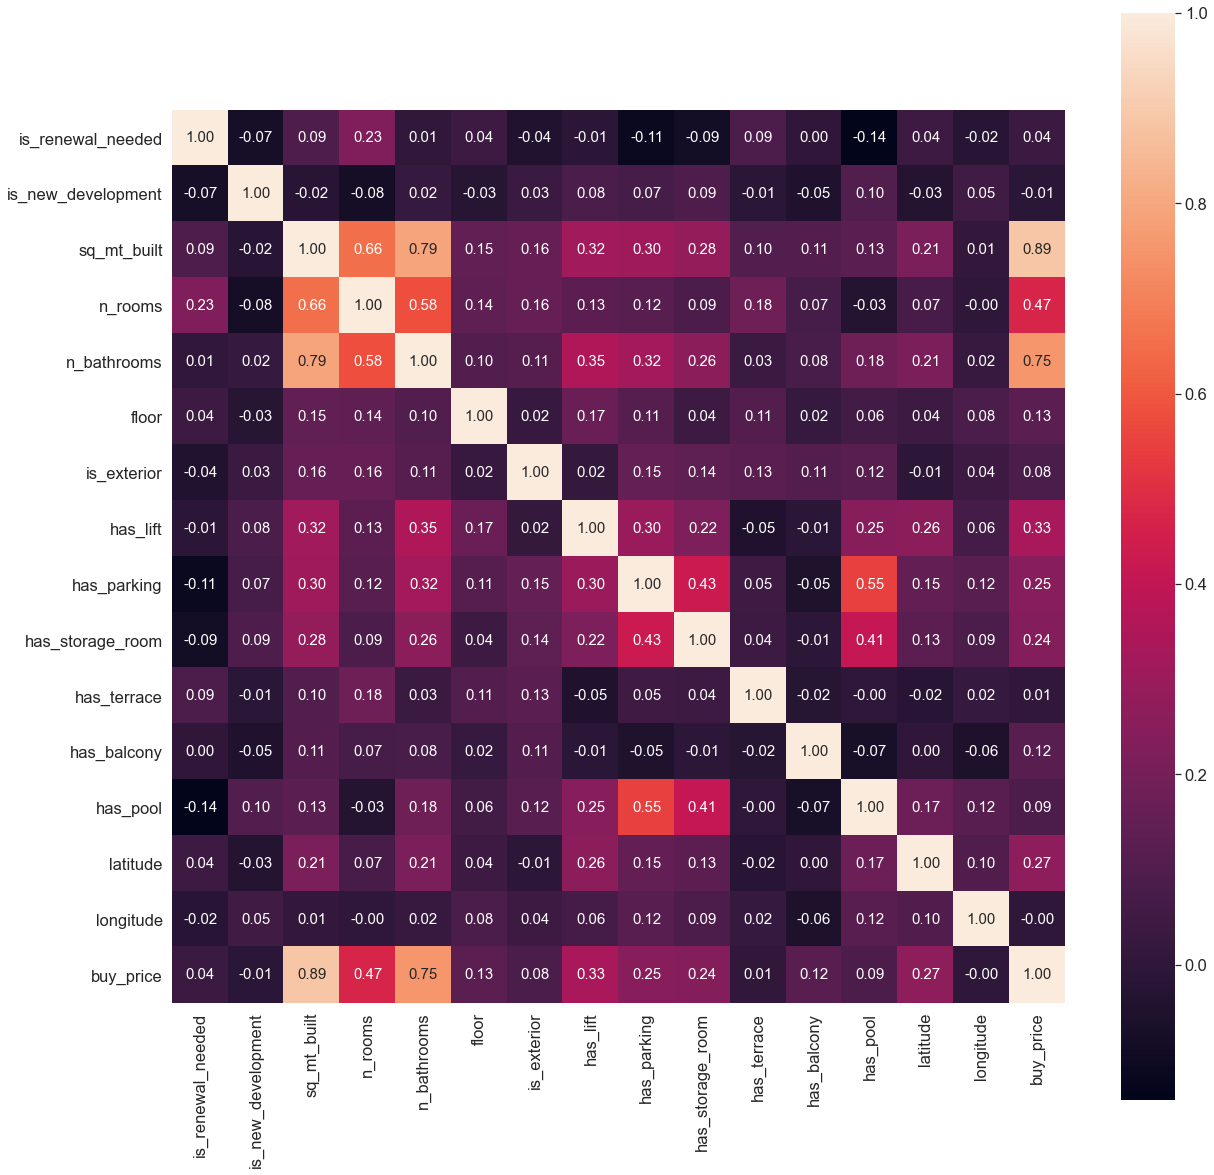

In [103]:
# Heatmap.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

In [104]:
data = data [['is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest

In [106]:
data.describe()

,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8923.000000,8.923000e+03
mean,0.197691,0.019948,98.784490,2.654713,1.592402,2.349098,0.885465,0.717248,0.255407,0.276813,0.360977,0.160820,0.147932,40.421732,-3.690353,4.073921e+05
std,0.398280,0.139831,56.889573,1.028684,0.824866,1.910329,0.318478,0.450362,0.436114,0.447448,0.480311,0.367386,0.355053,0.035339,0.035903,4.046681e+05
min,0.000000,0.000000,25.000000,0.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,7.000000e+04
25%,0.000000,0.000000,65.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.392825,-3.710970,1.750000e+05
50%,0.000000,0.000000,83.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.422742,-3.695211,2.890000e+05
75%,0.000000,0.000000,113.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.445414,-3.667741,4.950000e+05
max,1.000000,1.000000,562.000000,9.000000,7.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,4.350000e+06


In [107]:
"""d_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    'floor', 'latitude', 'longitude', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()"""

'd_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",\n                    \'floor\', \'latitude\', \'longitude\', \'buy_price\']]\n\nsns.pairplot(data, size=2.5, vars=d_analysis1)\nplt.tight_layout()'

In [108]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=7)

In [110]:
models = {
    "XGBRegressor" : XGBRegressor(objective ='reg:squarederror'),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [111]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado")

Entrenando XGBRegressor
Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado


-------XGBRegressor-------
RMSE 72128.531
R2 0.963
-------DecisionTree-------
RMSE 95548.393
R2 0.936
-------RandomForest-------
RMSE 68054.078
R2 0.967
-------ExtraTrees-------
RMSE 74727.319
R2 0.961
-------GradientBoosting-------
RMSE 85107.017
R2 0.949
-------HistGradientBoosting-------
RMSE 78975.28
R2 0.956
-------Voting-------
RMSE 69919.527
R2 0.966


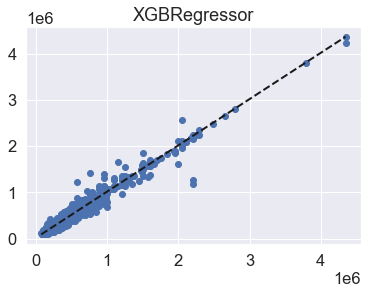

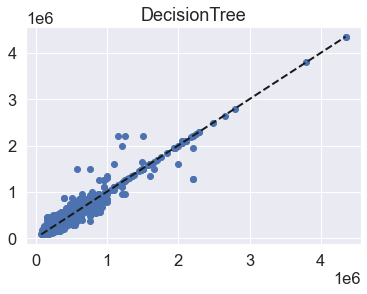

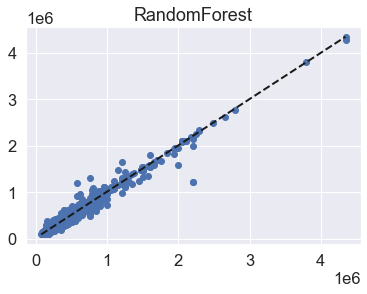

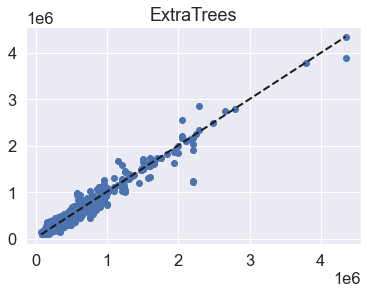

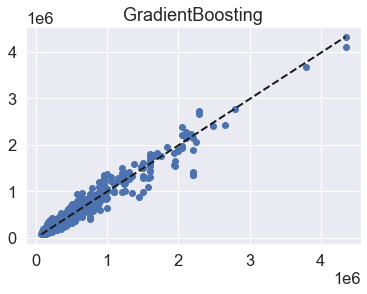

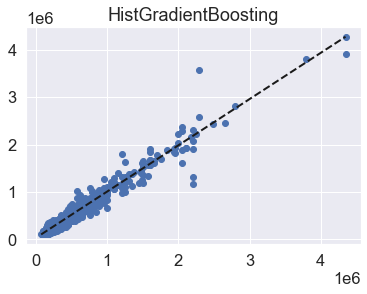

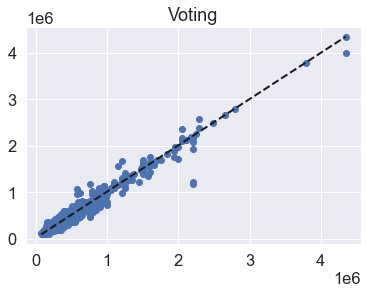

In [112]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [113]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

XGBRegressor accuracy0.8888189449147598
DecisionTree accuracy0.761561071772472
RandomForest accuracy0.8838128324045508
ExtraTrees accuracy0.87075852444247
GradientBoosting accuracy0.7974930346033378
HistGradientBoosting accuracy0.8784900709054941
Voting accuracy0.882850824933608


In [114]:
data.to_csv("..\outputs\h2o.csv")

## Pruebas con H2O

In [115]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 48 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_Javi_geldd1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.390 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [116]:
h2train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [117]:
columnas = [col for col in data.columns if col not in ["buy_price"]]

x = list(columnas)

y = "buy_price"

In [118]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(max_runtime_secs=1200, sort_metric='RMSE')
automl.train(x, y, training_frame=h2train)
leader_board = automl.leaderboard
leader_board.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201014_124331,61661.7,3.80216e+09,3.80216e+09,36380.6,0.14318
StackedEnsemble_BestOfFamily_AutoML_20201014_124331,62918.1,3.95869e+09,3.95869e+09,36400.2,0.147145
GBM_grid__1_AutoML_20201014_124331_model_19,65948.1,4.34915e+09,4.34915e+09,38655.7,0.152171
GBM_grid__1_AutoML_20201014_124331_model_13,66064.4,4.3645e+09,4.3645e+09,40250.8,0.153432
GBM_grid__1_AutoML_20201014_124331_model_16,66244,4.38827e+09,4.38827e+09,38102.9,0.151918
GBM_grid__1_AutoML_20201014_124331_model_11,66328.6,4.39948e+09,4.39948e+09,40153.3,0.152262
XGBoost_grid__1_AutoML_20201014_124331_model_3,66718.8,4.4514e+09,4.4514e+09,37251.7,0.157706
XGBoost_grid__1_AutoML_20201014_124331_model_24,67399.6,4.54271e+09,4.54271e+09,38706.3,0.1572
GBM_grid__1_AutoML_20201014_124331_model_1,67810.1,4.59821e+09,4.59821e+09,39947.4,0.151278
XGBoost_grid__1_AutoML_20201014_124331_model_5,67829.9,4.6009e+09,4.6009e+09,41611.5,0.158689


## XGBM H2O

In [194]:
from h2o.estimators import H2OXGBoostEstimator

In [195]:
data = h2o.import_file("..\outputs\h2o.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [196]:
data.describe()

Rows:8923
Cols:17




,C1,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,int
mins,0.0,0.0,0.0,25.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.3399339,-3.828782660082676,70000.0
mean,8659.626807127648,0.19769135940827076,0.019948447831446822,98.7844895214614,2.6547125406253493,1.5924016586349883,2.3490978370503193,0.8854645298666368,0.7172475624789869,0.2554073742015017,0.276812731144234,0.36097724980387763,0.16082035189958535,0.14793230976129104,40.42173241855504,-3.6903534456126117,407392.07486271433
maxs,17397.0,1.0,1.0,562.0,9.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.520553799999995,-3.5466159,4350000.0
sigma,5010.700997567948,0.39828038260768,0.13983096413223525,56.88957296306545,1.0286835244654653,0.8248660731339518,1.9103289436956405,0.3184783560866269,0.45036232892901745,0.43611439168079696,0.44744818753496807,0.4803108673518783,0.3673857545551938,0.355052769743171,0.03533881262169268,0.03590299660329414,404668.05916301056
zeros,1,7159,8745,0,4,0,966,1022,2523,6644,6453,5702,7488,7603,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,0.0,0.0,64.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.34326305,-3.688352297394898,85000.0
1,1.0,1.0,0.0,70.0,3.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.3551089,-3.7001047141537535,129900.0
2,3.0,0.0,0.0,64.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.345538899999994,-3.7109697,109900.0


In [197]:
X = data.col_names[1:-1]
y = data.col_names[-1]

train, test =data.split_frame([0.8], seed=1234)

In [198]:
train.shape, test.shape

((7162, 17), (1761, 17))

In [199]:
xgbm_h2o = H2OXGBoostEstimator()
houses_model = xgbm_h2o.train(X, y, training_frame=train)
print(xgbm_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602665690260_14


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 1704495129.4275467
RMSE: 41285.53172029575
MAE: 28493.244412786233
RMSLE: 0.12487654120747135
Mean Residual Deviance: 1704495129.4275467

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-14 14:09:45,0.002 sec,0.0,572683.123150,406987.348646,3.279660e+11
1,,2020-10-14 14:09:45,0.041 sec,1.0,412160.576420,286121.662305,1.698763e+11
2,,2020-10-14 14:09:45,0.057 sec,2.0,300018.032878,201519.008723,9.001082e+10
3,,2020-10-14 14:09:45,0.074 sec,3.0,221590.410895,143283.858932,4.910231e+10
4,,2020-10-14 14:09:45,0.091 sec,4.0,168240.319773,105376.017125,2.830481e+10
5,,2020-10-14 14:09:45,0.111 sec,5.0,131801.327722,81598.229463,1.737159e+10
6,,2020-10-14 14:09:45,0.129 sec,6.0,107159.982567,66586.699616,1.148326e+10
7,,2020-10-14 14:09:45,0.148 sec,7.0,91232.127684,57578.868907,8.323301e+09
8,,2020-10-14 14:09:45,0.166 sec,8.0,81008.650895,52039.040221,6.562402e+09
9,,2020-10-14 14:09:45,0.184 sec,9.0,73605.512448,48108.250505,5.417771e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,sq_mt_built,1.925248e+15,1.000000,0.869773
1,latitude,1.299881e+14,0.067518,0.058725
2,longitude,5.246858e+13,0.027253,0.023704
3,n_bathrooms,4.078568e+13,0.021185,0.018426
4,n_rooms,2.204903e+13,0.011453,0.009961
5,has_lift,1.653037e+13,0.008586,0.007468
6,floor,1.267546e+13,0.006584,0.005726
7,has_pool,3.525038e+12,0.001831,0.001593
8,has_terrace,2.659225e+12,0.001381,0.001201
9,is_renewal_needed,2.447439e+12,0.001271,0.001106


In [200]:
print("RMSE: ", round(xgbm_h2o.rmse(),3))
print("R2: ", round(xgbm_h2o.r2(),3))

RMSE:  41285.532
R2:  0.989


In [201]:
print("RMSE: ", xgbm_h2o.model_performance(test).rmse())
print("R2: ", xgbm_h2o.model_performance(test).r2())

RMSE:  65207.66631933076
R2:  0.9749100092103393


In [202]:
predict = xgbm_h2o.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [203]:
print(predict, test)

predict
271579
115249
144033
120578
255435
208549
105188
240311
102865
188954


C1,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
4,0,0,108,2,2,4,1,1,1,1,0,0,1,40.3558,-3.6884,260000
15,1,0,75,3,1,3,1,1,0,0,1,0,0,40.3455,-3.71097,129900
25,0,0,72,2,1,3,1,0,1,0,0,1,0,40.3455,-3.71097,138000
35,0,0,74,3,1,1,1,0,0,1,0,0,0,40.3551,-3.7001,139000
37,0,0,126,4,2,0,1,1,1,1,1,0,1,40.3399,-3.67339,275000
39,0,0,108,3,2,4,1,1,0,0,1,0,0,40.3551,-3.7001,179000
40,0,0,62,2,1,0,1,1,0,0,0,0,0,40.3455,-3.71097,123000
46,0,1,105,3,2,1,1,1,1,1,1,0,1,40.3399,-3.67339,204999
82,0,0,52,2,1,1,1,0,0,0,0,0,0,40.3558,-3.6884,100000
91,0,0,70,2,2,4,1,1,1,1,0,0,1,40.3558,-3.6884,210000


# Tasación

In [184]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [185]:
vivienda = {'neighborhood_id': "Malasaña-Universidad, Centro(Madrid)", # Uno del desplegable.
            'is_renewal_needed': True,     # True or False.
            'is_new_development': False,    # True or False.
            'sq_mt_built': 91,              # Valores inferiores a 140m2.
            'n_rooms': 3,                   # Valores inferiores a 3.
            'n_bathrooms': 2,               # Valores inferiores a 2.
            'floor': 1,                     # Del bajo a la 9ª planta.
            'is_exterior': True,            # True or False.
            'has_lift': True,               # True or False.
            'has_parking': True,            # True or False.
            'has_storage_room': True,       # True or False.
            'has_terrace': True,            # True or False.
            'has_balcony': True,            # True or False.
            'has_pool': True              # True or False.        
           }

In [186]:
geolocator = Nominatim(user_agent="http")

locate = geolocator.geocode(vivienda["neighborhood_id"], timeout=7)
vivienda["latitude"] = locate.latitude
vivienda["longitude"] = locate.longitude

In [187]:
vivienda.pop("neighborhood_id")
vivienda

{'is_renewal_needed': True,
 'is_new_development': False,
 'sq_mt_built': 91,
 'n_rooms': 3,
 'n_bathrooms': 2,
 'floor': 1,
 'is_exterior': True,
 'has_lift': True,
 'has_parking': True,
 'has_storage_room': True,
 'has_terrace': True,
 'has_balcony': True,
 'has_pool': True,
 'latitude': 40.4267079,
 'longitude': -3.7042311}

In [188]:
piso = pd.DataFrame.from_dict(vivienda, orient='index').T
piso

,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude
0,True,False,91,3,2,1,True,True,True,True,True,True,True,40.4267,-3.70423


In [189]:
def transf(column):

    le = preprocessing.LabelEncoder()
    piso[column] = le.fit_transform(piso[column])
    return piso[column]

In [190]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [191]:
piso.to_csv("..\outputs\new_piso.csv")

In [192]:
piso = h2o.import_file("..\outputs\new_piso.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [193]:
estimated_price = xgbm_h2o.predict(piso)
print(estimated_price)

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict
396636


# Elimino datos atípicos

In [ ]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [ ]:
plt.scatter(data["sq_mt_built"], data["buy_price"])

In [ ]:
data.head()

In [ ]:
"""data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)"""
#rt = lambda x: (1500*x+200000) 
data = data.drop(data[data["buy_price"]>900000].index)
data = data.drop(data[data["buy_price"]<120000].index)
data = data.drop(data[data["sq_mt_built"]>300].index)
#& data[data.apply(lambda row: data["buy_price"]<rt(data["sq_mt_built"]), axis=1)]].index)
#data = data.drop(data[data["sq_mt_built"]<50].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_rooms"]<1].index)
data = data.drop(data[data["n_bathrooms"]>2].index)

In [ ]:
plt.scatter(data["sq_mt_built"], data["buy_price"])

In [ ]:
"""data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)
data = data.drop(data[data["buy_price"]>700000].index)
data = data.drop(data[data["buy_price"]<190000].index)
data = data.drop(data[data["sq_mt_built"]>200].index)
data = data.drop(data[data["sq_mt_built"]<50].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_rooms"]<2].index)
data = data.drop(data[data["n_bathrooms"]>2].index)
data = data.drop(data[data["n_bathrooms"]<1].index)"""

In [ ]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [ ]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

In [ ]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [ ]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [ ]:
data.floor = pd.to_numeric(data.floor)

In [ ]:
data = data.drop(data[data["floor"]<1].index)

In [ ]:
data.columns

In [ ]:
data = data [['is_renewal_needed', 'is_new_development', 
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
              'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
              'has_terrace', 'has_balcony', 'has_pool', 'latitude',
              'longitude', 'buy_price']]

In [ ]:
data.describe()

In [ ]:
d_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    "n_bathrooms", 'floor', 'latitude',
              'longitude', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

In [ ]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

In [ ]:
data = data [['is_renewal_needed', 'is_new_development', 
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
              'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
              'has_terrace', 'has_balcony', 'has_pool', 'latitude',
              'longitude', 'buy_price']]

In [ ]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]   

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
models = {
    "XGBRegressor" : XGBRegressor(objective ='reg:squarederror'),
    "LinearRegression" : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [ ]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)